In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.makedirs('../figures', exist_ok = True)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
#Unique Drugs
clean_overdose = pd.read_csv('../data/overdose_age_data_clean.csv')

if 'drug_type' in clean_overdose.columns:
    drug_types = clean_overdose['drug_type'].unique()
    print(f"Drug types in dataset: {len(drug_types)}")
    for dt in drug_types:
        print(f"  - {dt}")

Drug types in dataset: 6
  - All drug overdose deaths
  - Drug overdose deaths involving any opioid
  - Drug overdose deaths involving natural and semisynthetic opioids
  - Drug overdose deaths involving methadone
  - Drug overdose deaths involving other synthetic opioids (other than methadone)
  - Drug overdose deaths involving heroin


In [4]:
#Summary Statistics of overdose deaths per drug

#Me
for drug in drug_types:
    drug_data = clean_overdose[clean_overdose['drug_type'] == drug]
    print(f"\n{drug}:")
    print(f" Mean Rate: {drug_data['ESTIMATE'].mean():.2f}")
#median rate
    print(f" Median Rate: {drug_data['ESTIMATE'].median():.2f}")
#Standard Deviation
    print(f" Standard Deviation: {drug_data['ESTIMATE'].std():.2f}")
#Minimum
    print(f" Minimum: {drug_data['ESTIMATE'].min():.2f}")
#Maximum
    print(f" Maximum {drug_data['ESTIMATE'].max():.2f}")


All drug overdose deaths:
 Mean Rate: 11.30
 Median Rate: 7.85
 Standard Deviation: 10.27
 Minimum: 0.10
 Maximum 54.30

Drug overdose deaths involving any opioid:
 Mean Rate: 6.53
 Median Rate: 4.40
 Standard Deviation: 7.02
 Minimum: 0.10
 Maximum 41.70

Drug overdose deaths involving natural and semisynthetic opioids:
 Mean Rate: 2.83
 Median Rate: 2.10
 Standard Deviation: 2.41
 Minimum: 0.00
 Maximum 9.50

Drug overdose deaths involving methadone:
 Mean Rate: 1.43
 Median Rate: 1.40
 Standard Deviation: 0.97
 Minimum: 0.00
 Maximum 4.80

Drug overdose deaths involving other synthetic opioids (other than methadone):
 Mean Rate: 2.38
 Median Rate: 0.90
 Standard Deviation: 4.34
 Minimum: 0.00
 Maximum 29.80

Drug overdose deaths involving heroin:
 Mean Rate: 2.49
 Median Rate: 1.50
 Standard Deviation: 2.93
 Minimum: 0.10
 Maximum 17.10


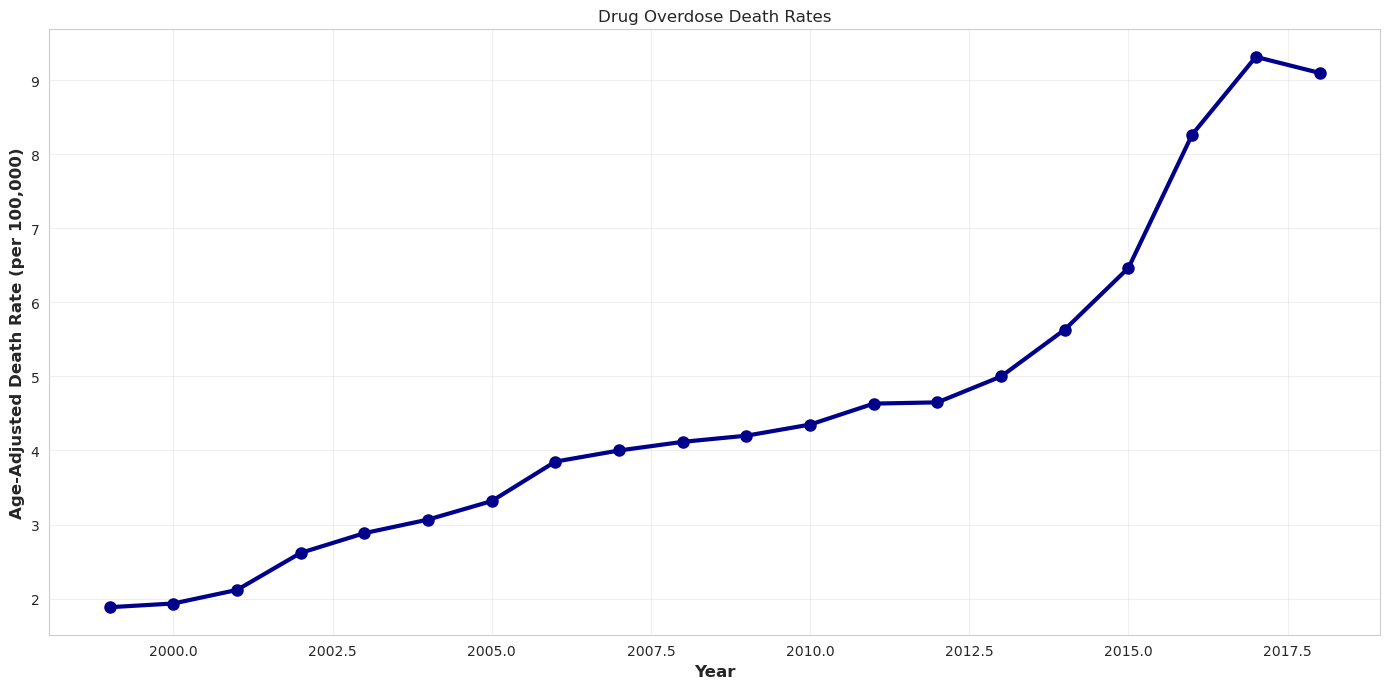

In [5]:
#Line Plot of Overall Trends

clean_overdose = pd.read_csv('../data/overdose_race_data_clean.csv')

trend_stats = clean_overdose[
    (clean_overdose['sex'] == 'All') &
    (clean_overdose['race_ethnicity'] == 'All')
    ].groupby('YEAR')['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(14,7))
plt.plot(trend_stats['YEAR'], trend_stats['ESTIMATE'],
         marker='o', linewidth=3, markersize=8, color = 'darkblue')
plt.title('Drug Overdose Death Rates')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Age-Adjusted Death Rate (per 100,000)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('../figures/overall_trend.png', dpi=300, bbox_inches='tight')
#print("✓ Saved: figures/overall_trend.png")
#plt.close()

    

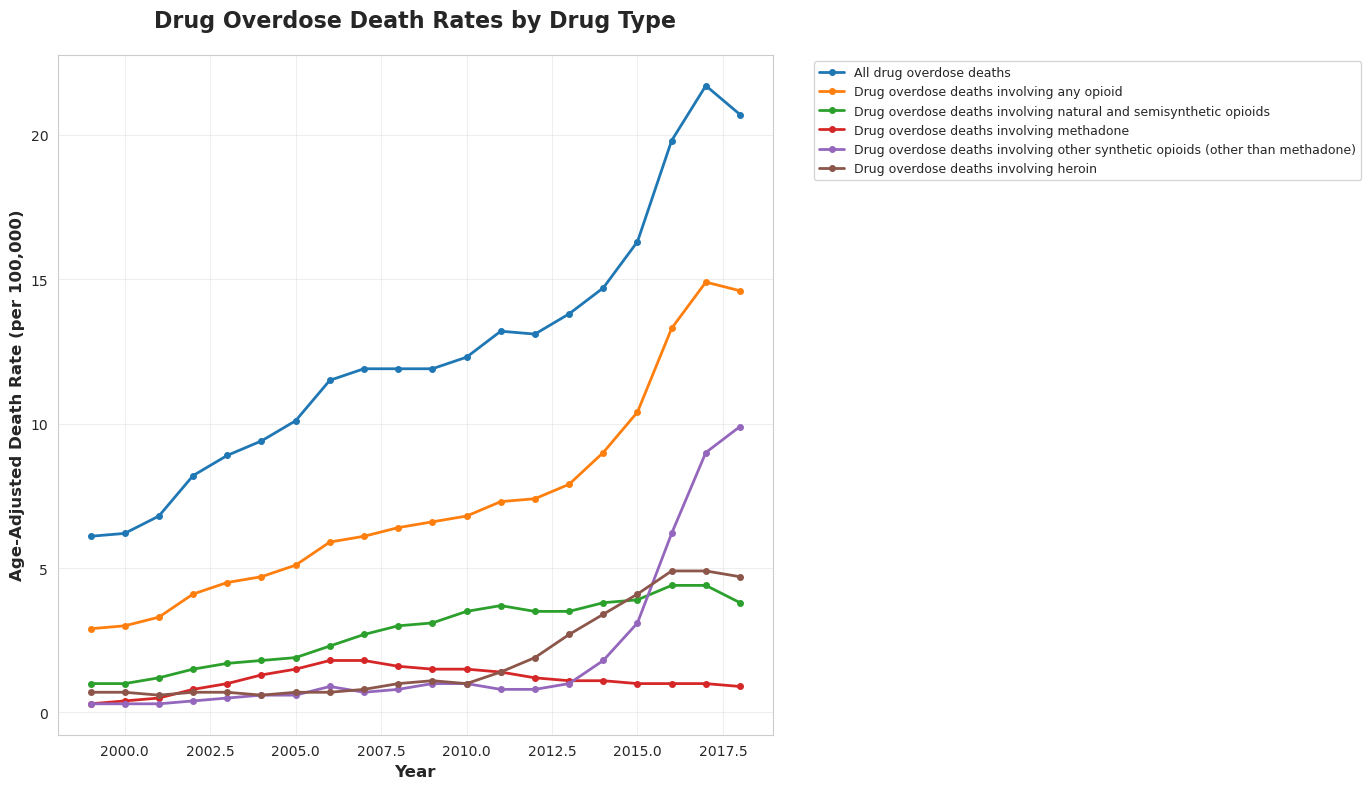

In [6]:
#Trend by Drug Type

clean_race_overdose = pd.read_csv('../data/overdose_race_data_clean.csv')

if 'drug_type' in clean_race_overdose.columns:
    plt.figure(figsize=(14,8))

all_drugs = clean_race_overdose['drug_type'].unique()

for drug in all_drugs:
    drug_trend = clean_race_overdose[
        (clean_race_overdose['drug_type'] == drug) &
        (clean_race_overdose['sex'] == 'All') &
        (clean_race_overdose['race_ethnicity'] == 'All')
        ].groupby('YEAR')['ESTIMATE'].mean().reset_index()

    if len(drug_trend) > 0:
        plt.plot(drug_trend['YEAR'], drug_trend['ESTIMATE'],
                 marker='o', linewidth=2, label=drug, markersize=4)
        
plt.title('Drug Overdose Death Rates by Drug Type', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Age-Adjusted Death Rate (per 100,000)', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()

#plt.savefig('../figures/trend_by_drug_type.png', dpi=300, bbox_inches='tight')
#print("✓ Saved: figures/trend_by_drug_type.png")
#plt.close()

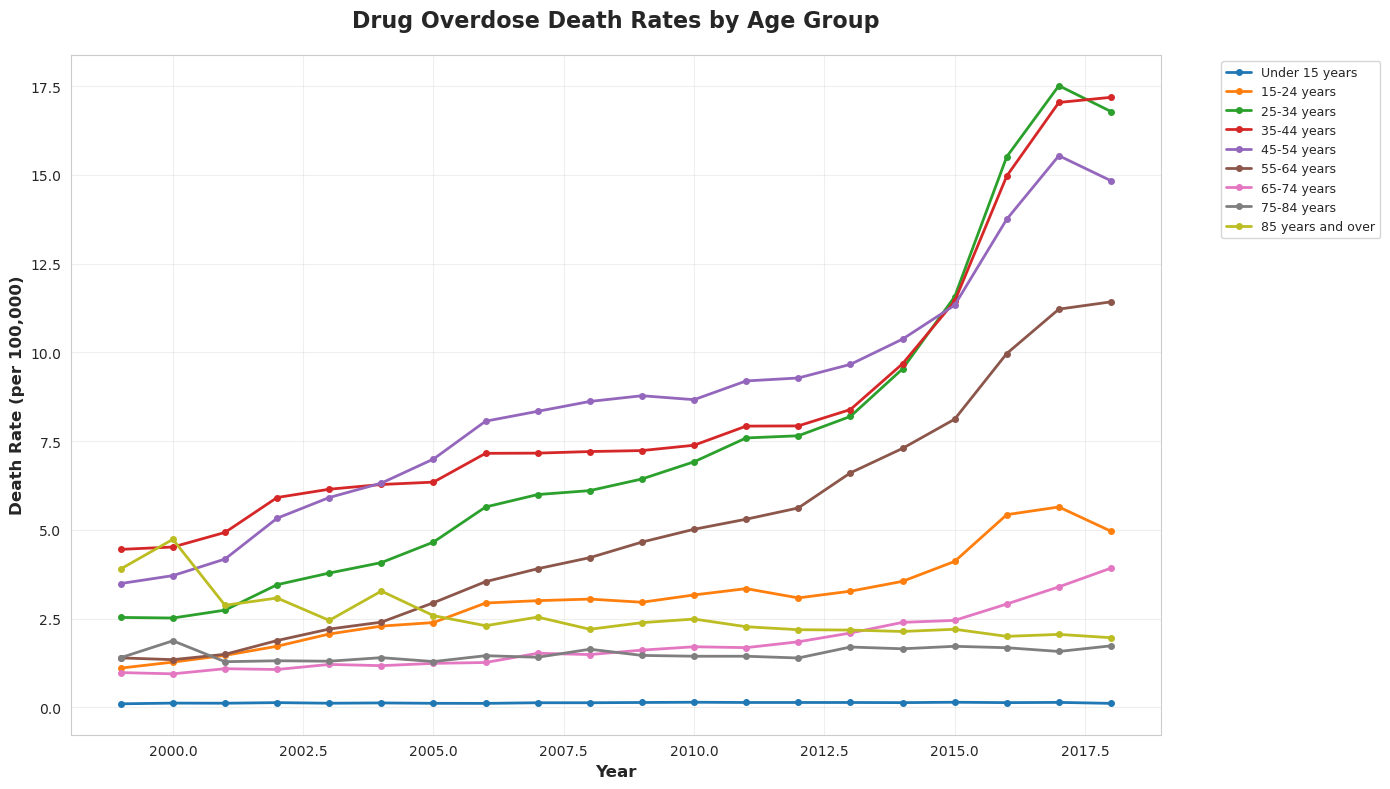

In [7]:
#Trend by Drug Type

clean_age_overdose = pd.read_csv('../data/overdose_age_data_clean.csv')

if 'age_group' in clean_age_overdose.columns:
    plt.figure(figsize=(14, 8))

clean_age_overdose = clean_age_overdose[clean_age_overdose["age_group"] != "All"]
age_groups = clean_age_overdose['age_group'].unique()

for age_grp in age_groups:
    age_trend = clean_age_overdose[
        (clean_age_overdose['age_group'] == age_grp)].groupby('YEAR')['ESTIMATE'].mean().reset_index()

    if len(age_trend) > 0:
        plt.plot(age_trend['YEAR'], age_trend['ESTIMATE'],
                 marker='o', linewidth=2, label=age_grp, markersize=4)

plt.title('Drug Overdose Death Rates by Age Group', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Death Rate (per 100,000)', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()

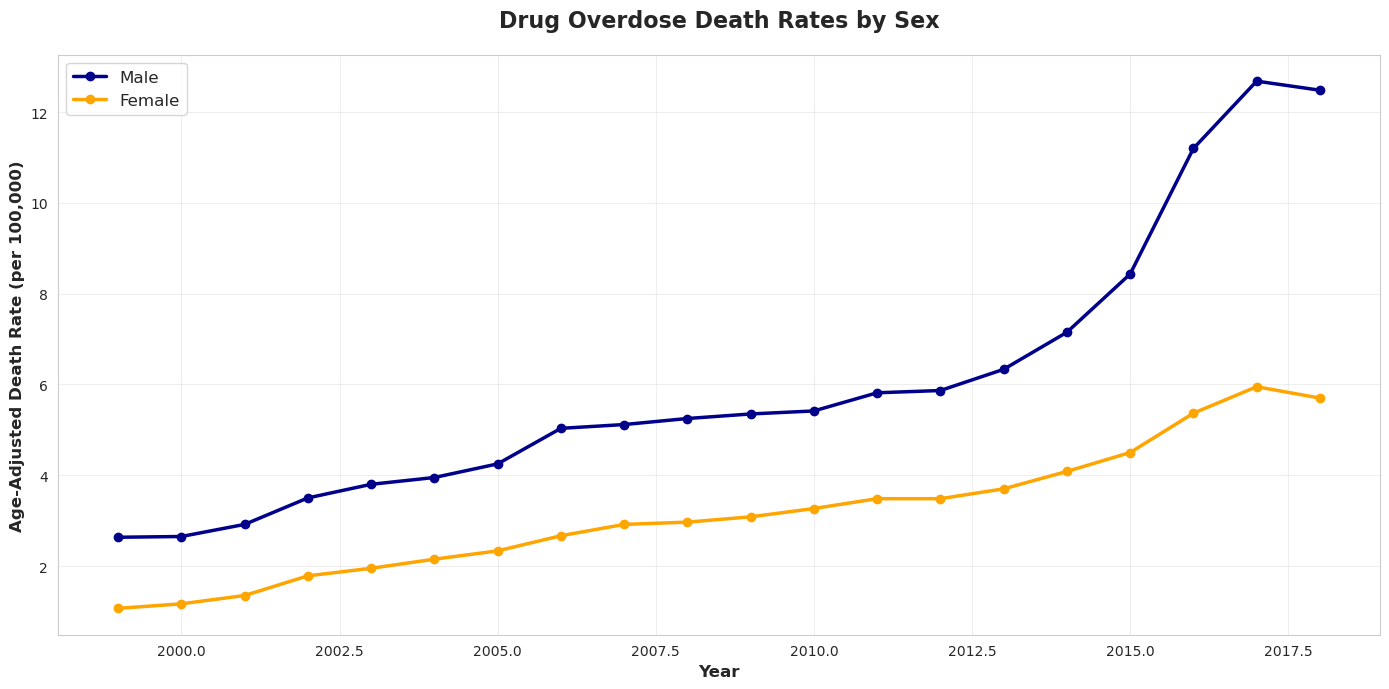

In [8]:
#Trend by Sex

sex_trend = clean_race_overdose[
    (clean_race_overdose['sex'].isin(['Male', 'Female'])) & 
    (clean_race_overdose['race_ethnicity'] == 'All')
].groupby(['YEAR', 'sex'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(14, 7))
for sex in ['Male', 'Female']:
    data = sex_trend[sex_trend['sex'] == sex]
    color = 'darkblue' if sex == 'Male' else 'orange'
    plt.plot(data['YEAR'], data['ESTIMATE'], 
             marker='o', linewidth=2.5, label=sex, markersize=6, color=color)

plt.title('Drug Overdose Death Rates by Sex', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Age-Adjusted Death Rate (per 100,000)', fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('../figures/trend_by_sex.png', dpi=300, bbox_inches='tight')
#print("✓ Saved: figures/trend_by_sex.png")
#plt.close()

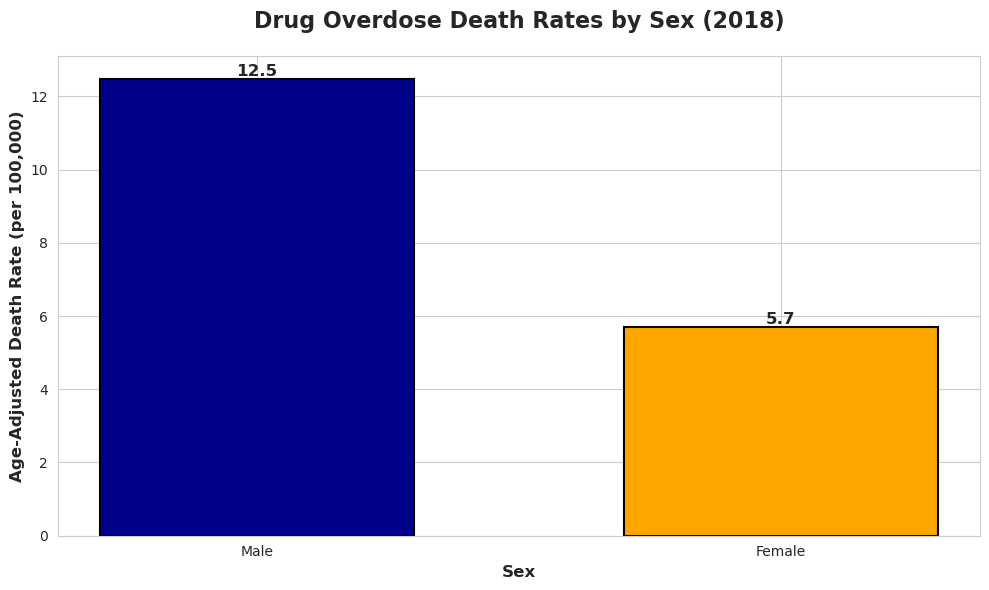

In [9]:
#Bar Charts Comparing Demographic Groups

most_recent_year = clean_race_overdose['YEAR'].max()
recent_data = clean_race_overdose[clean_race_overdose['YEAR'] == most_recent_year]

#Sex Comparison
sex_comparison = recent_data[
    (recent_data['sex'].isin(['Male', 'Female'])) & 
    (recent_data['race_ethnicity'] == 'All')
].groupby('sex')['ESTIMATE'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sex_comparison.index, sex_comparison.values, 
               color=['darkblue', 'orange'], width=0.6, edgecolor='black', linewidth=1.5)
plt.title(f'Drug Overdose Death Rates by Sex ({most_recent_year})', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Age-Adjusted Death Rate (per 100,000)', fontsize=12, fontweight='bold')
plt.xlabel('Sex', fontsize=12, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
#plt.savefig('../figures/comparison_by_sex.png', dpi=300, bbox_inches='tight')
#print("✓ Saved: figures/comparison_by_sex.png")
#plt.close()

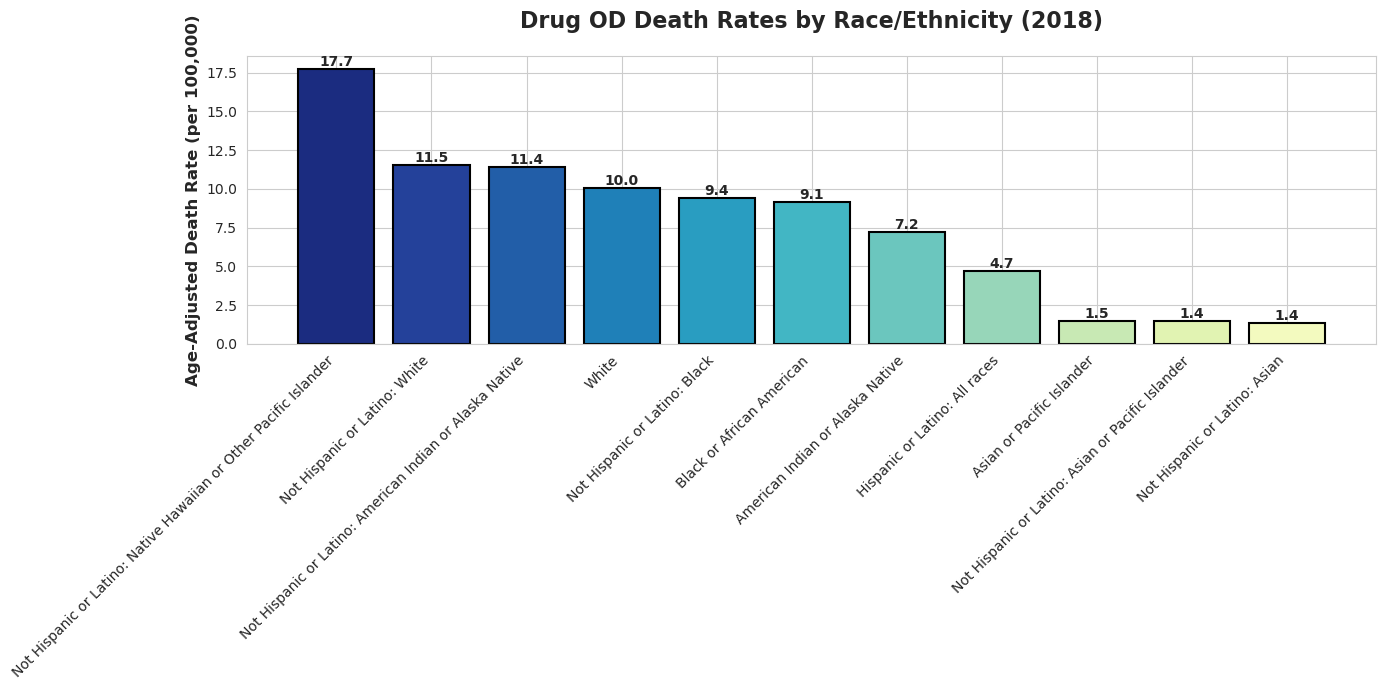

In [10]:
# Bar chart by race/ethnicity
race_comp = recent_data[
    (recent_data['race_ethnicity'] != 'All')
].groupby('race_ethnicity')['ESTIMATE'].mean().sort_values(ascending=False)

if len(race_comp) > 0:
    plt.figure(figsize=(14, 7))
    n_colors = len(race_comp)
    colors = sns.color_palette("YlGnBu_r", n_colors)
    bars = plt.bar(range(len(race_comp)), race_comp.values, 
                   color=colors, edgecolor='black', linewidth=1.5)
    plt.xticks(range(len(race_comp)), race_comp.index, 
               rotation=45, ha='right', fontsize=10)
    plt.title(f'Drug OD Death Rates by Race/Ethnicity ({most_recent_year})',
              fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Age-Adjusted Death Rate (per 100,000)',
               fontsize=12, fontweight='bold')
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}', ha='center', va='bottom', fontsize=10,
                 fontweight='bold')

    plt.tight_layout()
    #plt.savefig('../figures/comparison_by_race.png', dpi=300, bbox_inches='tight')
    #print("✓ Saved: figures/comparison_by_race.png")
    #plt.close()

In [11]:
summ_table = recent_data.groupby(['sex', 'race_ethnicity'])['ESTIMATE'].agg([
    ('Mean Rate', 'mean'),
    ('Count', 'count')
]).round(2).sort_values('Mean Rate', ascending=False)

print(summ_table.head(20))

#summ_table.to_csv('../figures/summary_statistics.csv')
#print("\n✓ Saved: figures/summary_statistics.csv")


                                                           Mean Rate  Count
sex    race_ethnicity                                                      
Male   Not Hispanic or Latino: Native Hawaiian or Othe...      17.70      1
       Not Hispanic or Latino: White                           15.42     12
       Not Hispanic or Latino: American Indian or Alas...      14.33     10
       Not Hispanic or Latino: Black                           13.88     12
       White                                                   13.62     12
       Black or African American                               13.48     12
       All                                                     12.48      6
All    All                                                      9.10      6
Male   American Indian or Alaska Native                         8.94     10
Female Not Hispanic or Latino: American Indian or Alas...       8.50     10
       Not Hispanic or Latino: White                            7.62     12
Male   Hispa